## Fourier analysis for signal procesing

Using a discrete fourier transform, it is posible to difference all the frequencies that make a signal the frequency of the signal is obtained as:

$$f_{signal} = \frac{k}{N}f_s $$

Where $k$ is the position of the point, $N$ is the total number of points and $f_s$ is the sampling frequency.

This leads to the bin width of:

$$ \delta f_{signal} = \frac{1}{T} $$

Where $T$ is the frequency. The highest frequency that can be detected (Nyquist) is given by:

$$ f_{max} = \frac{1}{2\cdot \delta t} = \frac{f_s}{2} $$

It is important to consider that one has to be careful with the mapping frequencies. The obtained spectrum extends until $f_{max}$, but after that value, the frequencies are not correct. This is a characteristic of the discrete fourier transform.

### Libraries

In [36]:
import numpy as np
import pylab as plt
import json
import scienceplots
import json
import requests

#%matplotlib notebook

# Makes plots look better
plt.style.use(['science', 'notebook'])

## Testing some functions

Text(0, 0.5, 'Amplitude')

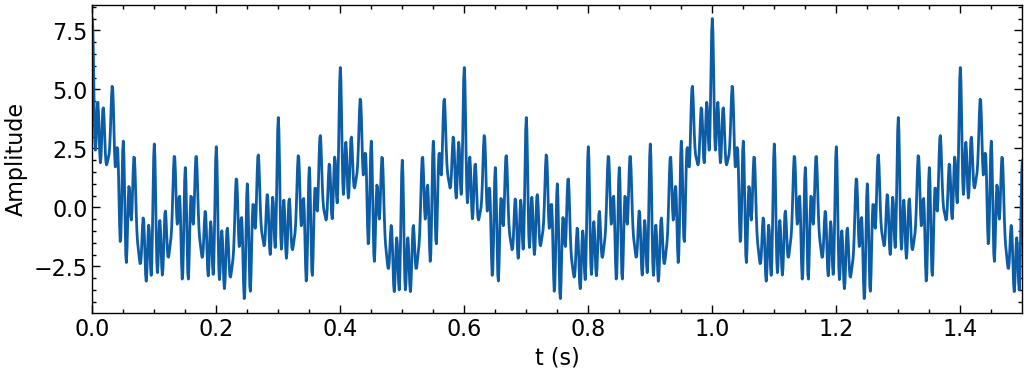

In [37]:
freq = np.array([100, 2, 5, 60, 120, 3, 7, 30]) #Frequencies of a signal

dt = 1E-3 # This is the "sample rate", in this case is simulating the data of an instrument
                
t = np.arange(0,5, dt)
                
signal = np.zeros_like(t)  

for f in freq:
    omega = 2*np.pi*f
    wave = np.cos(omega*t)
    signal += wave
                

plt.figure(figsize = (12,4))
plt.plot(t, signal, )
plt.xlim(0,1.5)
plt.xlabel('t (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

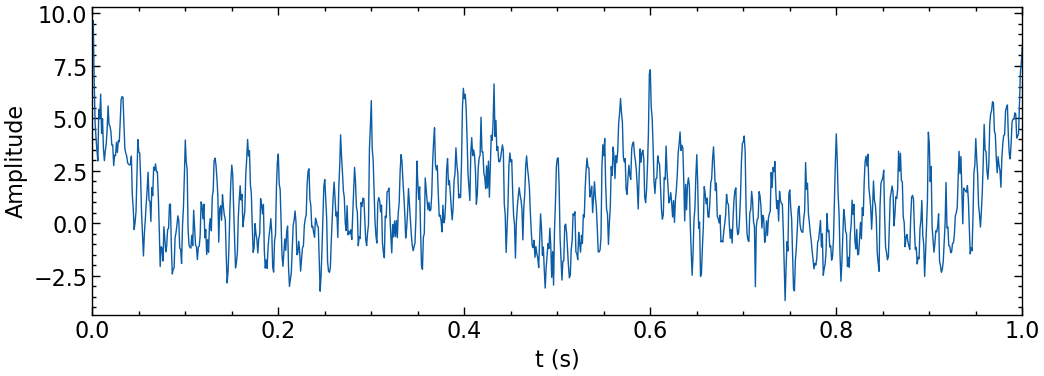

In [38]:
noisy_signal = signal + np.random.normal(1, 0.5, len(t))
plt.figure(figsize = (12,4))
plt.plot(t, noisy_signal, linewidth = 1)
plt.xlim(0,1)
plt.xlabel('t (s)')
plt.ylabel('Amplitude')

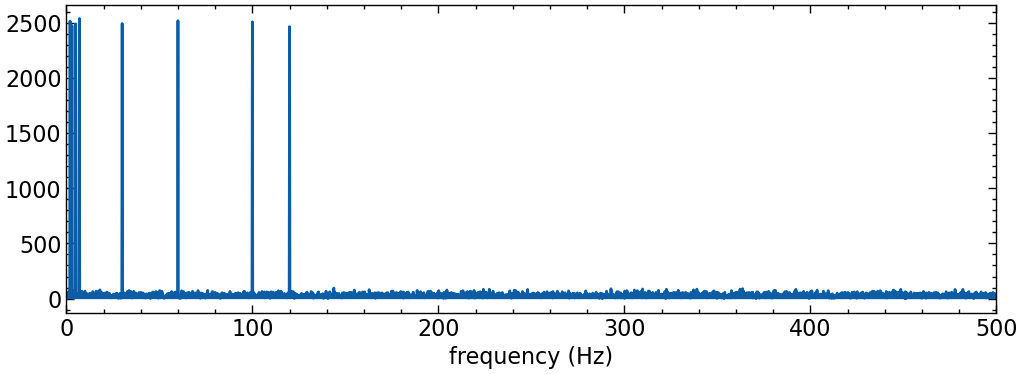

In [39]:
fft_signal_y = np.fft.fft(noisy_signal-np.mean(noisy_signal)) # The y value of the fourier transform, the data must be centered around 0.
fft_signal_x = np.fft.fftfreq(len(fft_signal_y), d = dt) # The frequencies (with the transformation mentioned above) 

plt.figure(figsize = (12,4))
plt.plot(fft_signal_x, np.abs(fft_signal_y))
plt.xlim(0,1/(2*dt)) # We only care about the portion with measurable frequencies
plt.xlabel('frequency (Hz)')
plt.show()

As it can be seen, there are some mayor frequencies and also some noise on the frequencies. We can zoom in and confirm that the frequencies are equal to those that we put in, also, if we don't limit the frequencies to the measurable range, we can see a mirror image for the negative values.

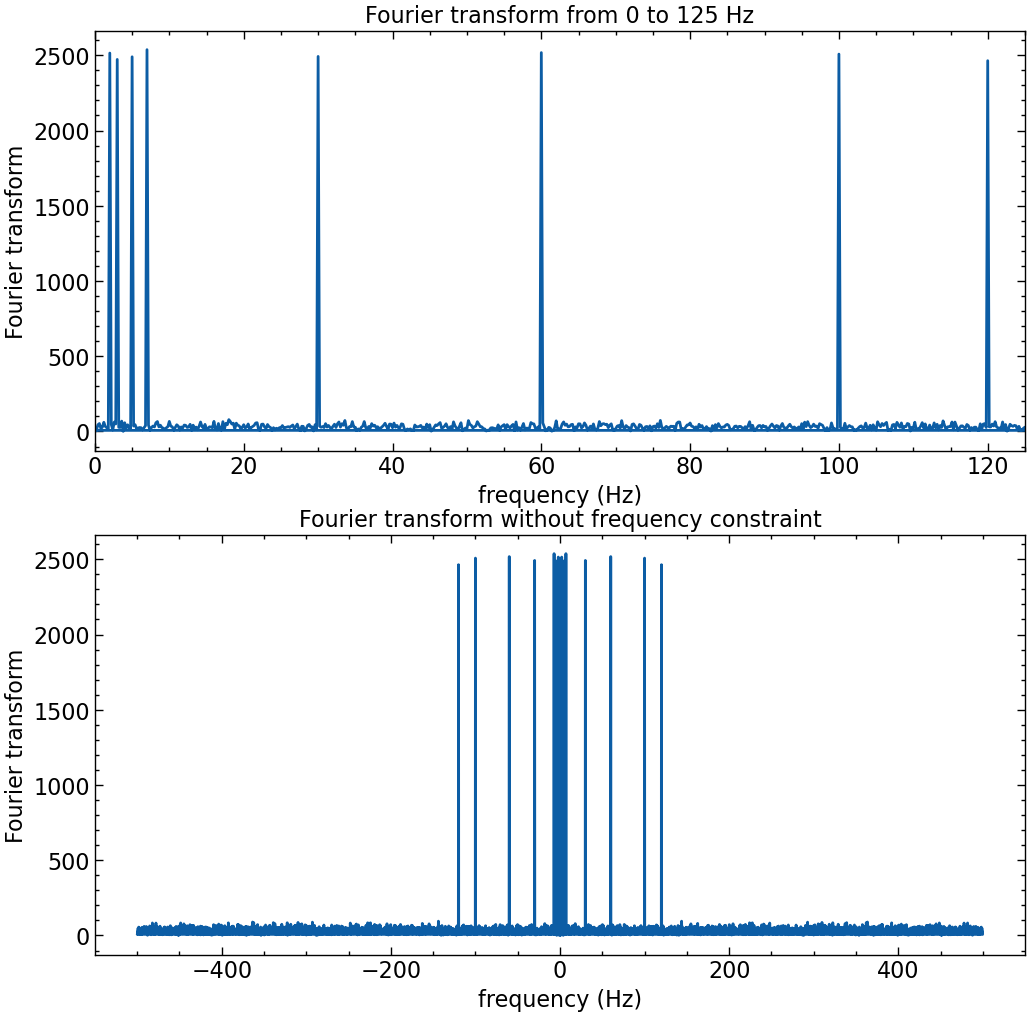

In [40]:
fig, axes = plt.subplots(2, 1, figsize = (12,12))

ax = axes[0]
ax.plot(fft_signal_x, np.abs(fft_signal_y))
ax.set_xlim(0,125)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('Fourier transform')
ax.set_title('Fourier transform from 0 to 125 Hz')

ax = axes[1]
ax.plot(fft_signal_x, np.abs(fft_signal_y))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('Fourier transform')
ax.set_title('Fourier transform without frequency constraint')

plt.show()

# Filtering frequencies and removing some noise.

We can select only the frequencies that we are interested using a filter ans the convolution property of the fourier transform. In this case, let's filter only the frequencies with higher values of the fourier transform than 500.

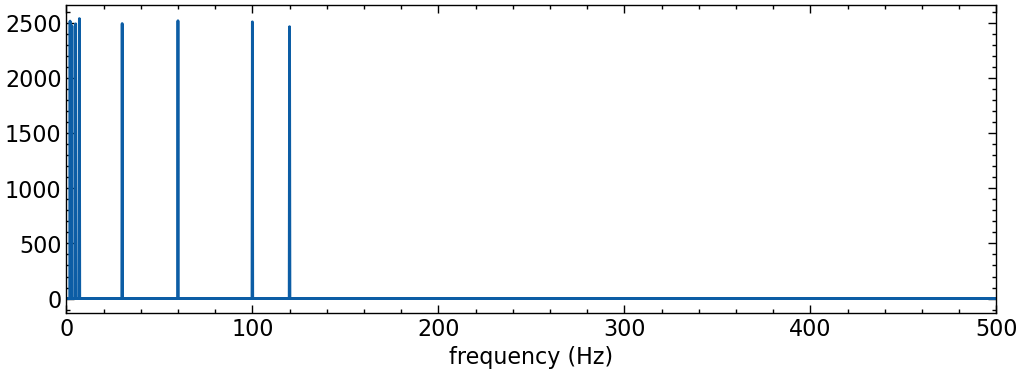

In [41]:
fft_filter = np.zeros_like(fft_signal_x)

fft_filter[np.abs(fft_signal_y) > 500] = 1  #We are only selecting the frequencies with higher amplitudes, removing the noise

fft_signal_y_filt =  fft_filter * fft_signal_y

plt.figure(figsize = (12,4))
plt.plot(fft_signal_x, np.abs(fft_signal_y_filt))
plt.xlim(0,1/(2*dt)) # We only care about the portion with measurable frequencies
plt.xlabel('frequency (Hz)')
plt.show()

The noise was removed, now we can recover the original signal without the noise added. 

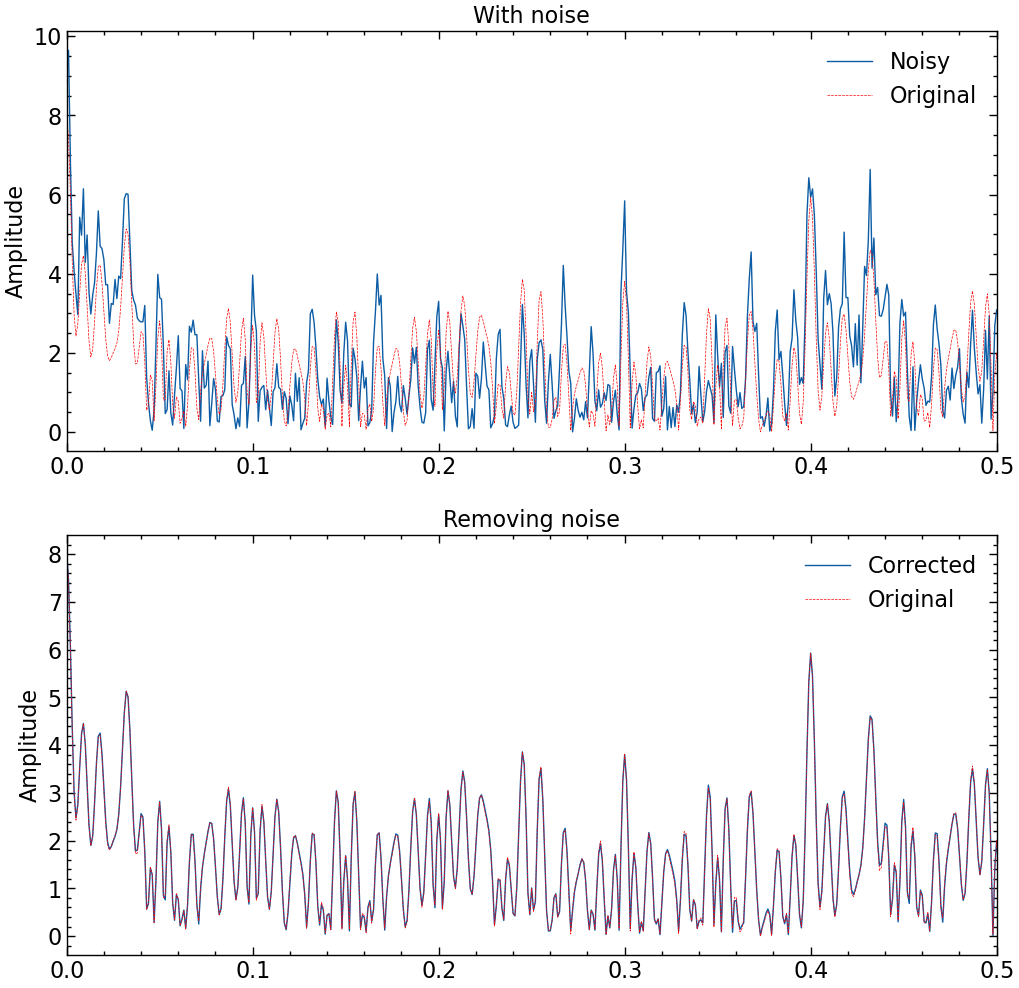

In [42]:
corrected_signal = np.fft.ifft(fft_signal_y_filt)

fig, axes = plt.subplots(2, 1, figsize = (12,12))

ax = axes[0]
ax.plot(t, np.abs(noisy_signal), linewidth = 1, label = 'Noisy')
ax.plot(t, np.abs(signal), '--', color = 'red', linewidth = 0.5, label = 'Original')
ax.set_ylabel('Amplitude')
ax.set_xlim(0,0.5)
ax.set_title('With noise')
ax.legend()

ax = axes[1]
ax.plot(t, np.abs(corrected_signal), linewidth = 1, label = 'Corrected')
ax.plot(t, np.abs(signal), '--', color = 'red', linewidth = 0.5, label = 'Original')
ax.set_xlim(0,0.5)
ax.set_ylabel('Amplitude')
ax.set_title('Removing noise')
ax.legend()

plt.show()

## Filtering the higher frequencies
This subsection is just a small demonstration that one can filterthe frequencies that one would like

In [43]:
fft_filter_1 = np.zeros_like(fft_signal_x)
fft_filter_2 = np.zeros_like(fft_signal_x)


fft_filter_1[np.abs(fft_signal_x) < 5] = 1 # Filter to get only frequencies lower than 10

fft_filter_2[np.abs(fft_signal_y) > 500] = 1  # Filter to remove noise.

fft_signal_y_filt_1 =  fft_filter_1 * fft_signal_y

fft_signal_y_filt_2 =  fft_filter_1 * fft_filter_2 * fft_signal_y

corrected_signal_1 = np.fft.ifft(fft_signal_y_filt_1)

corrected_signal_2 = np.fft.ifft(fft_signal_y_filt_2)



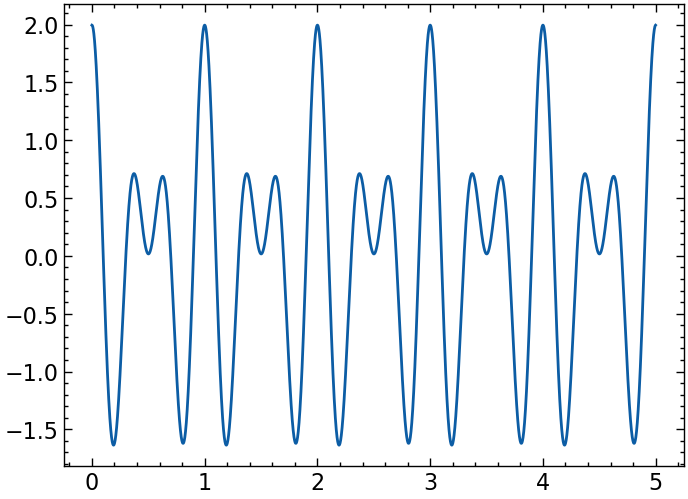

In [44]:
plt.plot(t, corrected_signal_2)

# Analizing data from the GOES using the fourier transform.

The Geostationary Operational Environmental Satellites (GOES) is capable of providing information about the geomagnetic activity of the earth, it can detect storms or substorms. The data that this instrument provides are given in dictionaries with the componets of the magnetic field and its total magnitude. This data is the average of the measumerement for each minute [[1]](https://www.swpc.noaa.gov/products/goes-magnetometer).

A daily variation is expected due to the magneticspheric currents that generate stronger magnetic fields in the day than at night when measured from a geostationary orbit like the cuando se mide desde una órbita geoestacionaria como la del GOES 16.
[[1](https://www.swpc.noaa.gov/products/goes-magnetometer),[2](http://www.geomag.bgs.ac.uk/education/earthmag.html#_Toc2075560)]


## Import the data
The data of the magnetometer can be found from the GOES magnetometer page

In [45]:
url = 'https://services.swpc.noaa.gov/json/goes/primary/magnetometers-7-day.json'
response = requests.get(url)

if response.status_code == 200: #If the response was succesful
    # Parse the JSON data
    json_data = json.loads(response.text)
    print('data loaded succesfully')
else:
    print('error')

data loaded succesfully


/tmp/ipykernel_6196/2457406168.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = np.array([dic['time_tag'] for dic in json_data], dtype = 'datetime64')


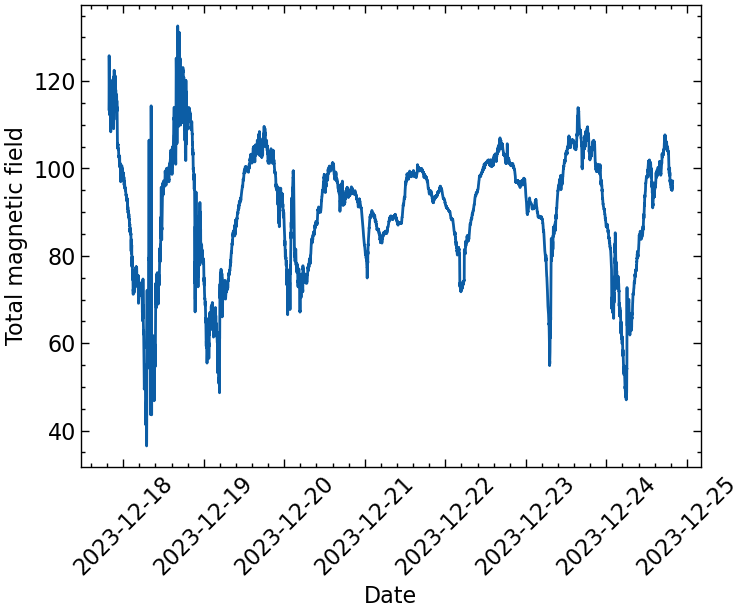

In [46]:
total_magnetic_field = np.array([dic['total'] for dic in json_data])
time = np.array([dic['time_tag'] for dic in json_data], dtype = 'datetime64')

plt.plot(time, total_magnetic_field)
plt.xticks(rotation = 45)
plt.ylabel('Total magnetic field')
plt.xlabel('Date')
plt.show()

There one can see that the magnetic field oscilates with a period of one day.
We could see if there are other frequencies that cannot see directly. Let's first see the data in seconds and transform it to hertz using the fourier transform.

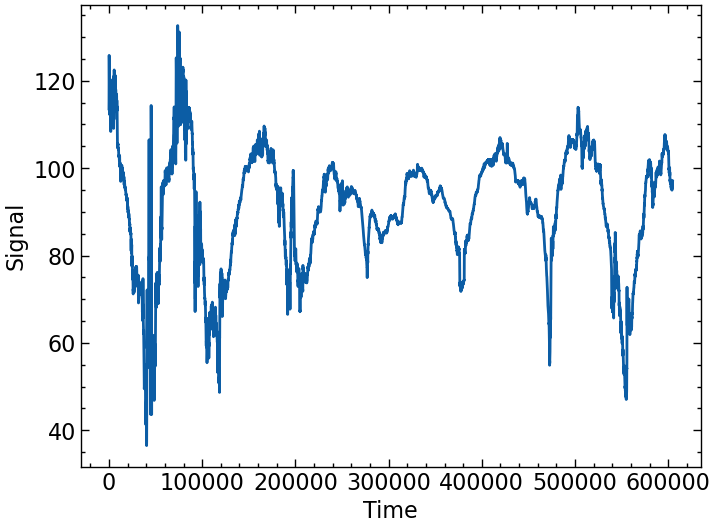

In [47]:
total_magnetic_field = np.array([dic['total'] for dic in json_data])
t = np.linspace(0, 60*len(time), len(time))

plt.plot(t, total_magnetic_field)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()

Text(0, 0.5, 'Fourier transform')

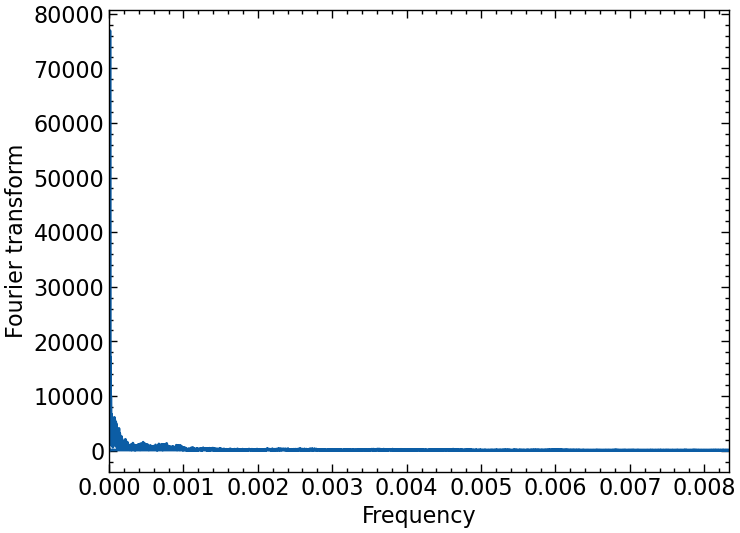

In [48]:
fft_magnetic_signal = np.fft.fft(total_magnetic_field-np.mean(total_magnetic_field))
freq = np.fft.fftfreq(len(fft_magnetic_signal), d = 60) # Each datapoint is taken every 60 s

plt.plot(freq, np.abs(fft_magnetic_signal))
plt.xlim(0, 1/(2*60))
plt.xlabel('Frequency')
plt.ylabel('Fourier transform')

Making zoom to the lower frequencies

Text(0, 0.5, 'Fourier transform')

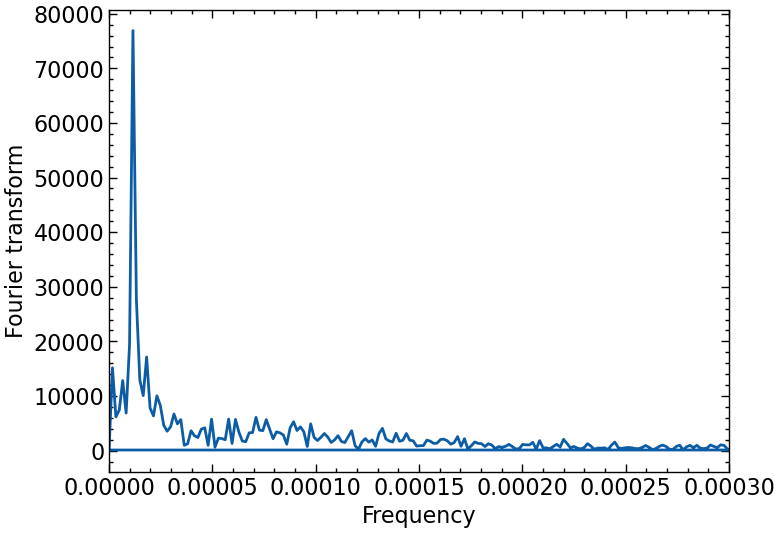

In [49]:
plt.plot(freq, np.abs(fft_magnetic_signal))
plt.xlim(0, 0.0003)
plt.xlabel('Frequency')
plt.ylabel('Fourier transform')

[27.99722222 23.99761905 20.99791667]


Text(0, 0.5, 'Fourier transform')

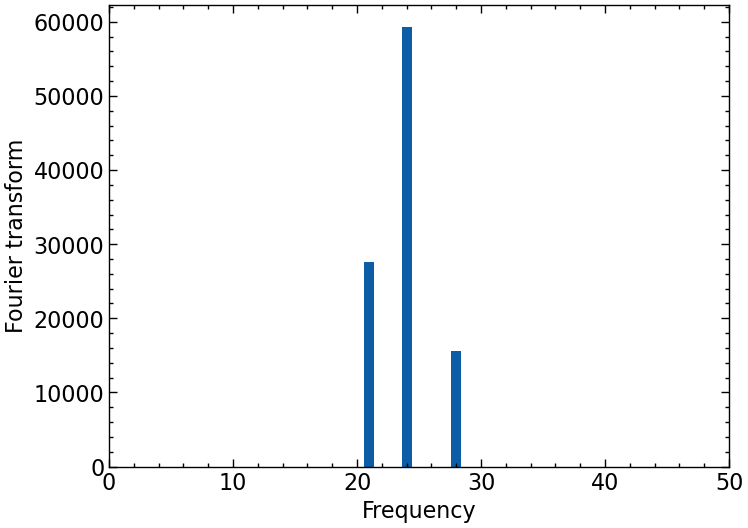

In [50]:
main_freq = freq[(fft_magnetic_signal > 10000)*(freq > 0)] # Frequencies with higher values
period = 1/main_freq *1/3600 # The periods in hours
print(period)

plt.bar(period, fft_magnetic_signal[(fft_magnetic_signal > 10000)*(freq > 0)])
plt.xlabel('Frequency')
plt.xlim(0,50)
plt.ylabel('Fourier transform')

As can be seen, the frequencies are around 24h (this can change depending on the solar activity of the last 7 days). This can be explained by the solar cosmic particle radiation, that affects the intensity (and shape) of the earth's magnetic field in the following way:
When the solar wind and other cosmic radiation interacts with the earth's magnetic field it can magnify the magnetic field in the region where the geostationary orbits are located on the side of the incoming solar wind, and decrease the intensity of the magnetic on the oposite side (the night side). See figure below:
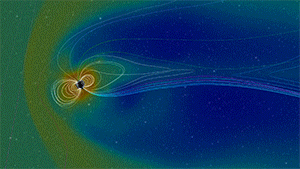
Since the data is obtained from a geostationary orbit, the satelite that collects the data rotates with the earth
and therefore experiences these changes of the magnetic field as it traslates to the side of the solar wind to the darkside and viceversa. As a result this effect is generated because of the noninertial reference fram of the satelites that collect the data.

Using this example it can be seen that the fourier transform of a signal is not always as clear as the invented signal at the begining of this notebook, it is usually full of noise and the frequency peaks are not necesssarily well defined.